In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [2]:
russell = pd.read_csv('Russell2000 Daily Returns.csv')

russell['RET'] = pd.to_numeric(russell['RET'], errors='coerce')
russell['RETX'] = pd.to_numeric(russell['RETX'], errors='coerce')

russell.head(10)

C:\Users\joel3\AppData\Local\Temp\ipykernel_13176\654371068.py:1: DtypeWarning: Columns (2,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  russell = pd.read_csv('Russell2000 Daily Returns.csv')


,PERMNO,date,SICCD,TICKER,COMNAM,HSICIG,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,NUMTRD,RETX,sprtrn,enterdate,positive,negative,total,market_cap
0,10026,2023-01-03,2052,JJSF,J & J SNACK FOODS CORP,NaN,147.08000,151.92000,151.48000,89954.0,0.011823,19229.0,3627.0,0.011823,-0.004001,2023-01-03,0.0,0.0,2.0,2.912809e+06
1,10026,2023-01-04,2052,JJSF,J & J SNACK FOODS CORP,NaN,150.24001,153.09000,151.22000,52980.0,-0.001716,19229.0,2367.0,-0.001716,0.007539,NaN,0.0,0.0,0.0,2.907809e+06
2,10026,2023-01-05,2052,JJSF,J & J SNACK FOODS CORP,NaN,148.68500,153.00000,149.60001,60472.0,-0.010713,19229.0,2510.0,-0.010713,-0.011646,NaN,0.0,0.0,0.0,2.876659e+06
3,10026,2023-01-06,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.85001,153.32001,152.64000,57034.0,0.020321,19229.0,5521.0,0.020321,0.022841,2023-01-06,0.0,0.0,2.0,2.935115e+06
4,10026,2023-01-09,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.39999,152.49001,149.61000,63214.0,-0.019851,19229.0,3466.0,-0.019851,-0.000768,NaN,0.0,0.0,0.0,2.876851e+06
5,10026,2023-01-10,2052,JJSF,J & J SNACK FOODS CORP,NaN,148.88000,151.06000,149.87000,112759.0,0.001738,19229.0,3001.0,0.001738,0.006978,NaN,0.0,0.0,0.0,2.881850e+06
6,10026,2023-01-11,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.32001,152.53999,152.39000,57350.0,0.016815,19229.0,2634.0,0.016815,0.012849,NaN,0.0,0.0,0.0,2.930307e+06
7,10026,2023-01-12,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.81500,153.10001,152.42999,70931.0,0.000262,19229.0,2786.0,0.000262,0.003416,NaN,0.0,0.0,0.0,2.931076e+06
8,10026,2023-01-13,2052,JJSF,J & J SNACK FOODS CORP,NaN,150.50000,154.67000,154.49001,50967.0,0.013514,19229.0,2605.0,0.013514,0.003997,NaN,0.0,0.0,0.0,2.970688e+06
9,10026,2023-01-17,2052,JJSF,J & J SNACK FOODS CORP,NaN,153.66000,157.09000,154.22000,67542.0,-0.001748,19229.0,2452.0,-0.001748,-0.002030,NaN,0.0,0.0,0.0,2.965496e+06


              PERMNO          BIDLO          ASKHI            PRC  \
count  490389.000000  490317.000000  490317.000000  490317.000000   
mean    47968.380500     345.560296     351.922355     347.882566   
std     31771.564522   11437.464784   11617.842028   11525.757440   
min     10026.000000       0.333300       0.395300    -517.065000   
25%     18013.000000      20.360000      21.150000      20.610000   
50%     35263.000000      42.250000      43.522100      42.700000   
75%     82575.000000      91.650000      93.914000      92.440000   
max     93436.000000  559100.000000  566570.000000  563072.750000   

                VOL            RET        SHROUT           RETX  \
count  4.903170e+05  490292.000000  4.903180e+05  490292.000000   
mean   2.325300e+06       0.000935  2.429324e+05       0.000879   
std    7.191577e+06       0.029457  6.806829e+05       0.029464   
min    0.000000e+00      -0.864374  5.750000e+02      -0.864374   
25%    2.629660e+05      -0.011613  4.49672

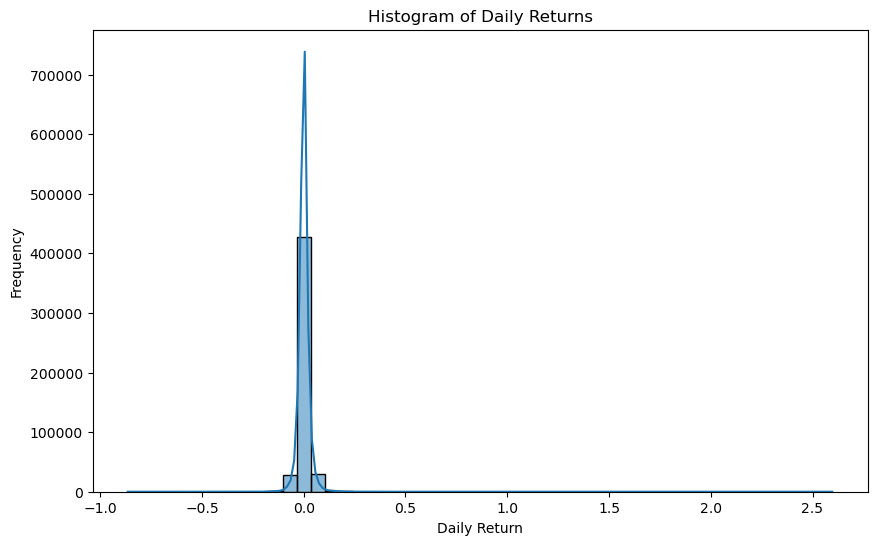

In [3]:
# Change date format
russell['date'] = pd.to_datetime(russell['date'], format='%Y-%m-%d')

# Remove the columns HSICIG and enterdate
russell.drop(columns=['HSICIG', 'enterdate', 'NUMTRD'], inplace=True)

# Adding lagged columns
russell['tomorrow_return'] = russell.groupby('TICKER')['RET'].shift(-1)
russell['yesterday_return'] = russell.groupby('TICKER')['RET'].shift(1)
russell['yesterday_volume'] = russell.groupby('TICKER')['VOL'].shift(1)

# Add columns for moving averages
russell['10_day_ma'] = russell['PRC'].rolling(window=10).mean()
russell['20_day_ma'] = russell['PRC'].rolling(window=20).mean()
russell['30_day_ma'] = russell['PRC'].rolling(window=30).mean()

# Create "proper?" column
russell['proper?'] = (russell['10_day_ma'] > russell['20_day_ma']) & (russell['20_day_ma'] > russell['30_day_ma']).astype(int)

# Create price minus 
russell['Ask_minus_Bid'] = russell['ASKHI'] - russell['BIDLO']

# Cr
russell['comp_size'] = pd.qcut(russell['market_cap'], q=10, labels=False)

# Summary statistics
print(russell.describe())

# Plot histogram of returns
plt.figure(figsize=(10, 6))
sns.histplot(data=russell, x='RET', bins=50, kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


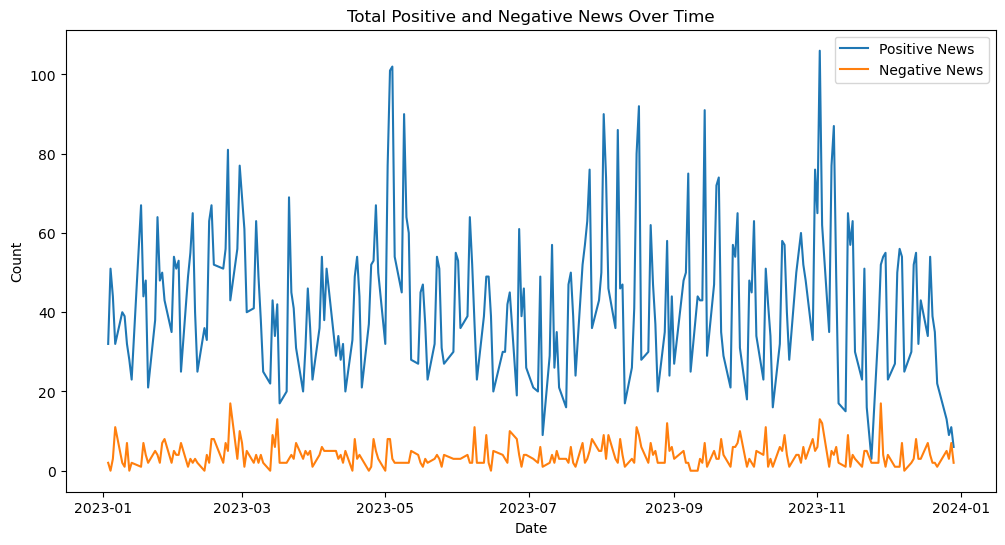

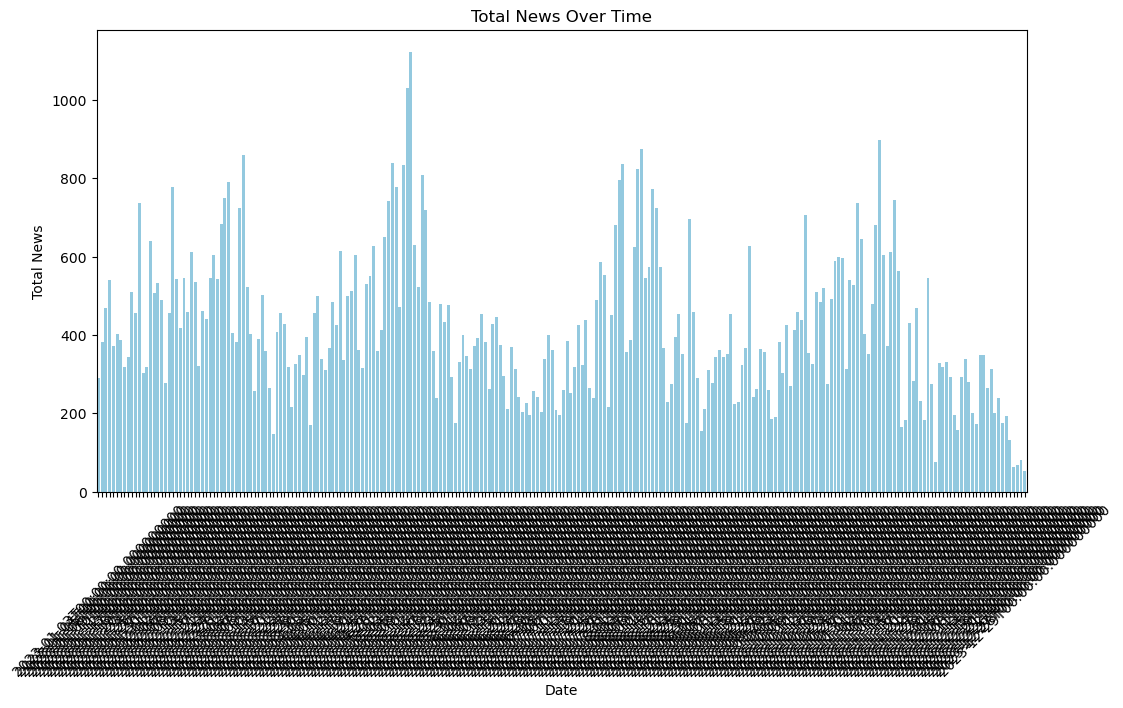

In [4]:
# Daily aggregation
daily_summary = russell.groupby(['date', 'sprtrn']).agg(
    sum_positive=('positive', 'sum'),
    sum_negative=('negative', 'sum'),
    sum_total=('total', 'sum')
).reset_index()

# Plot line chart of total positive and negative news over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='date', y='sum_positive', label='Positive News')
sns.lineplot(data=daily_summary, x='date', y='sum_negative', label='Negative News')
plt.title('Total Positive and Negative News Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot bar chart of total news over time
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_summary, x='date', y='sum_total', color='skyblue')
plt.title('Total News Over Time')
plt.xlabel('Date')
plt.ylabel('Total News')
plt.xticks(rotation=45)
plt.show()

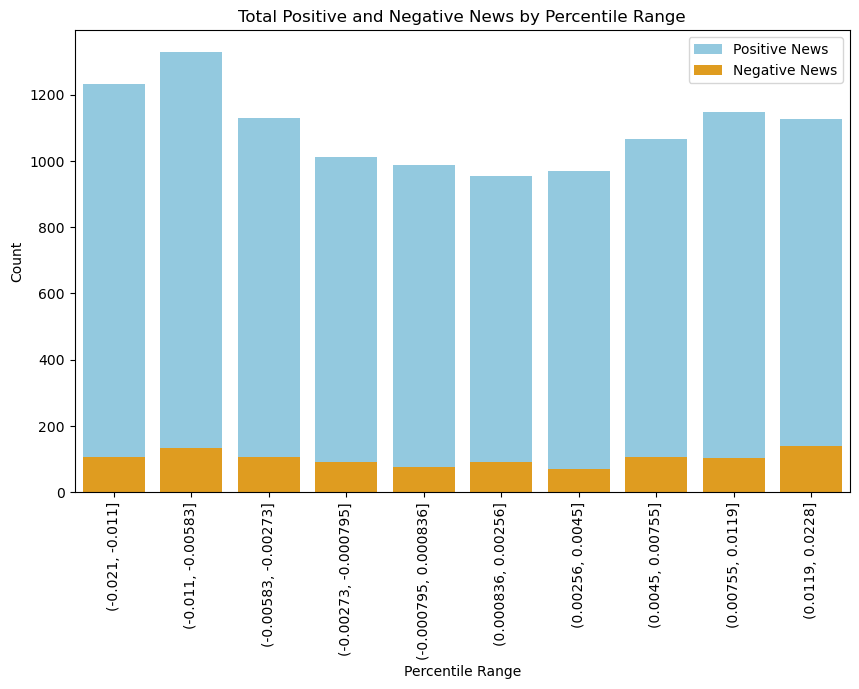

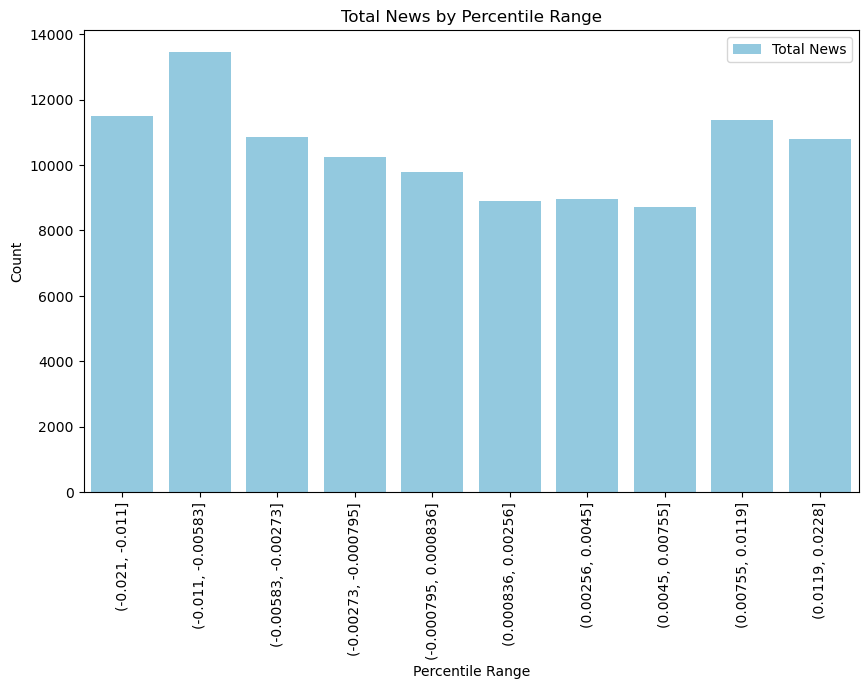

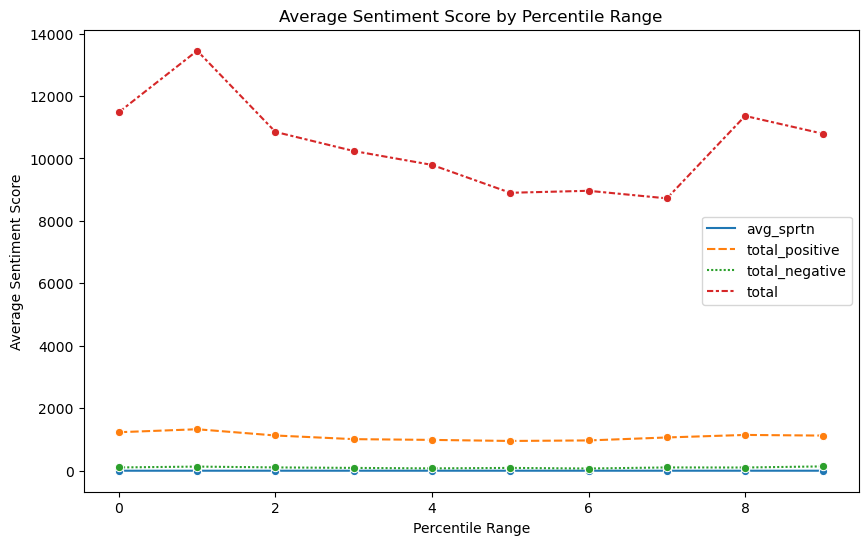

In [5]:
# Percentile summary
ranked_sprtrn = daily_summary.copy()
ranked_sprtrn['sprtrn_percentile'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10, labels=False)
ranked_sprtrn['percentile_range'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10)

percentile_summary = ranked_sprtrn.groupby('percentile_range').agg(
    avg_sprtn=('sprtrn', 'mean'),
    total_positive=('sum_positive', 'sum'),
    total_negative=('sum_negative', 'sum'),
    total=('sum_total', 'sum')
).reset_index()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=percentile_summary, x='percentile_range', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total', color='skyblue', label='Total News')
plt.title('Total News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot line chart of average sentiment score by percentile range
plt.figure(figsize=(10, 6))
sns.lineplot(data=percentile_summary.drop(columns='percentile_range'), marker='o', color='green')
plt.title('Average Sentiment Score by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Average Sentiment Score')
plt.show()


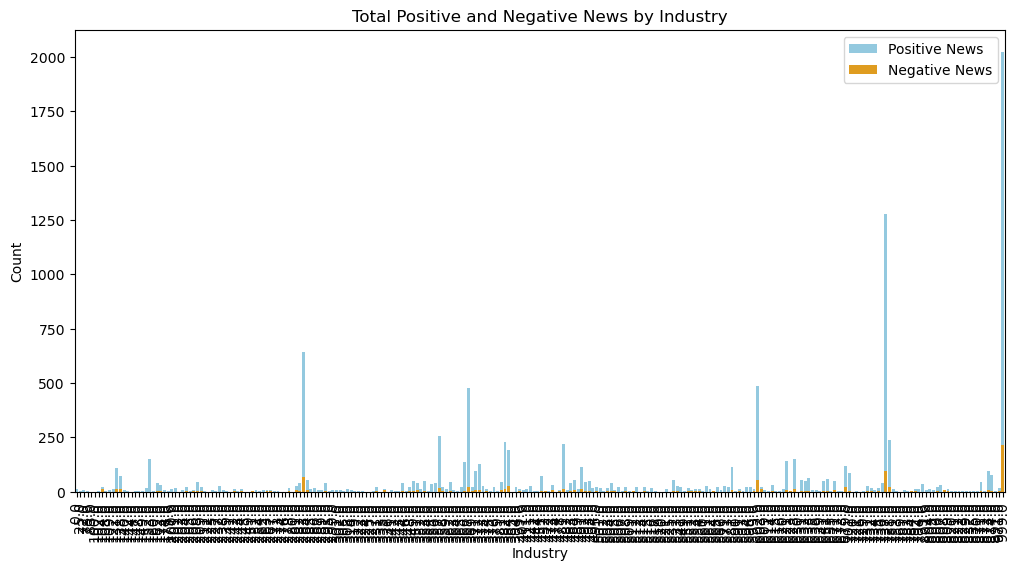

In [6]:
# Assuming 'russell' is your DataFrame containing the data
russell['SICCD'] = pd.to_numeric(russell['SICCD'], errors='coerce')

# Industry summary
industry_summary = russell.groupby(russell['SICCD'] // 10).agg(
    num_firms=('TICKER', 'nunique'),
    cum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

industry_summary['positive_perc'] = industry_summary['total_positive'] / industry_summary['total']
industry_summary['negative_perc'] = industry_summary['total_negative'] / industry_summary['total']

# Plot bar chart of total positive and negative news by industry
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_summary, x='SICCD', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=industry_summary, x='SICCD', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()


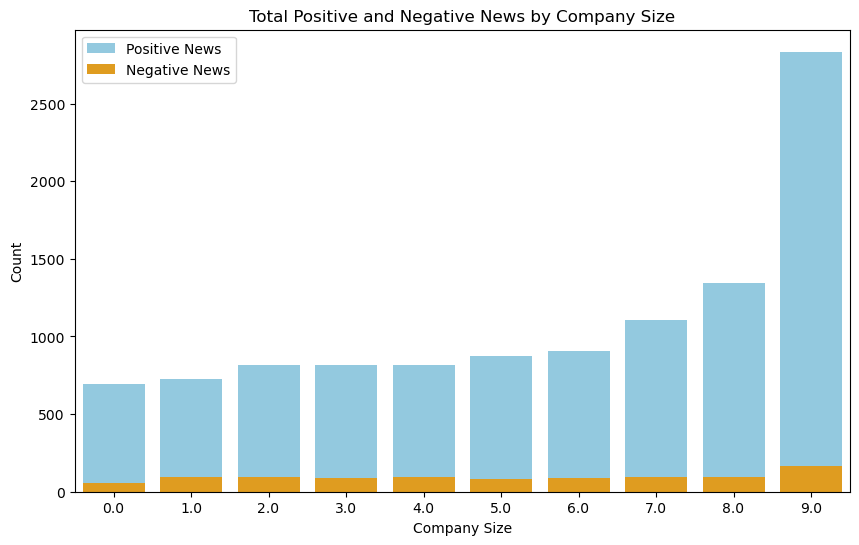

In [7]:
# Company size summary
stock_size = russell.copy()
stock_size['comp_size'] = pd.qcut(stock_size['market_cap'], q=10, labels=False)
company_size_summary = stock_size.groupby('comp_size').agg(
    sum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

company_size_summary['positive_perc'] = company_size_summary['total_positive'] / company_size_summary['total']
company_size_summary['negative_perc'] = company_size_summary['total_negative'] / company_size_summary['total']

# Plot bar chart of total positive and negative news by company size
plt.figure(figsize=(10, 6))
sns.barplot(data=company_size_summary, x='comp_size', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=company_size_summary, x='comp_size', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.legend()
plt.show()


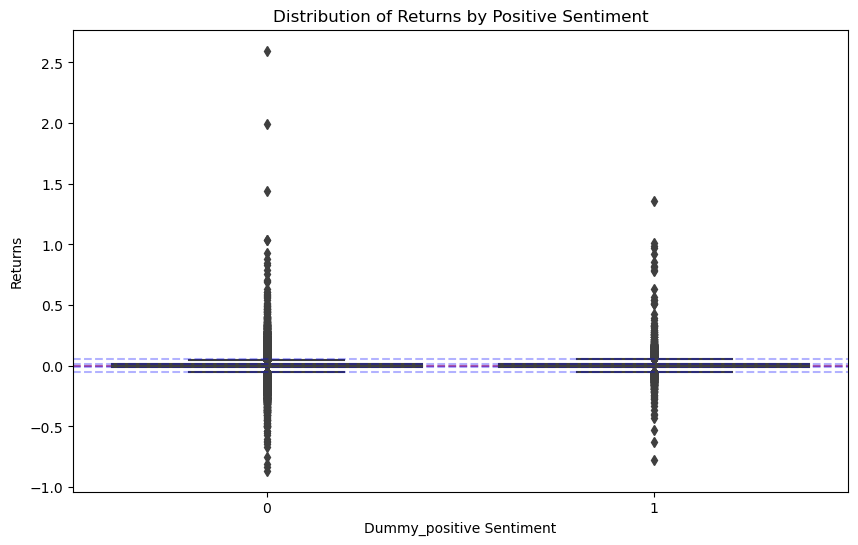

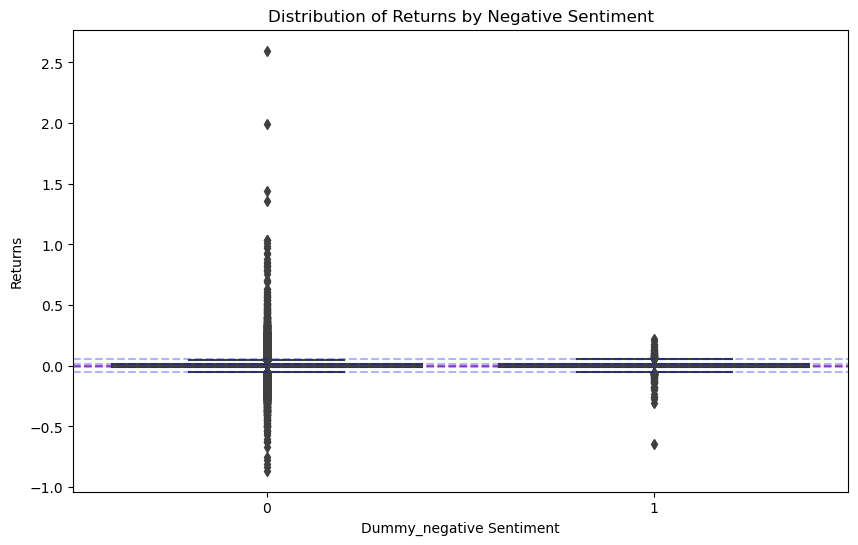

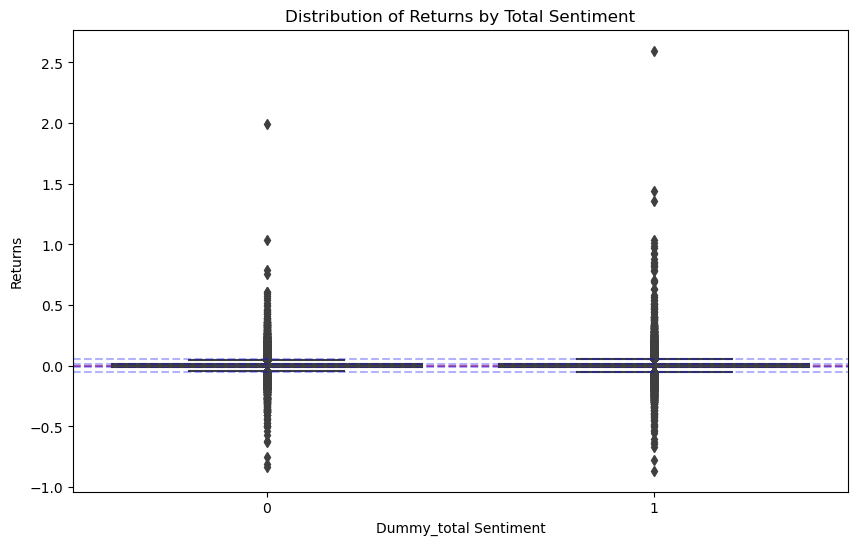

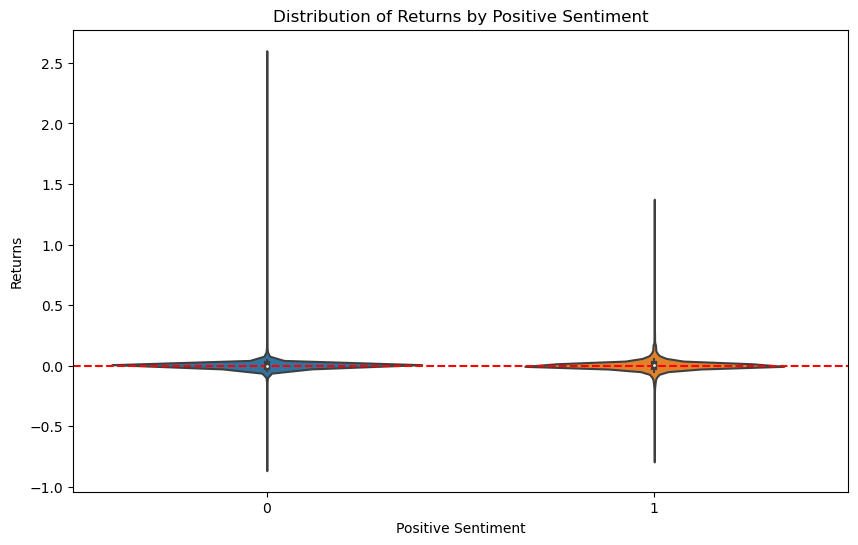

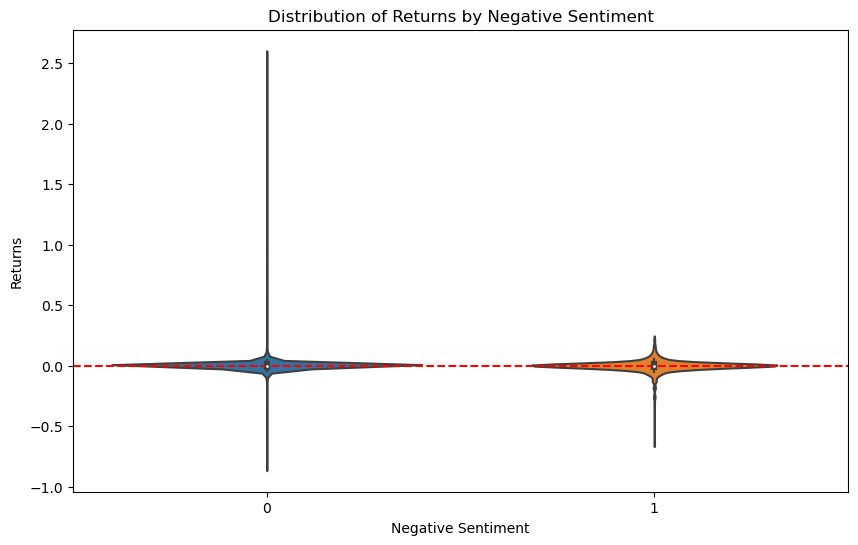

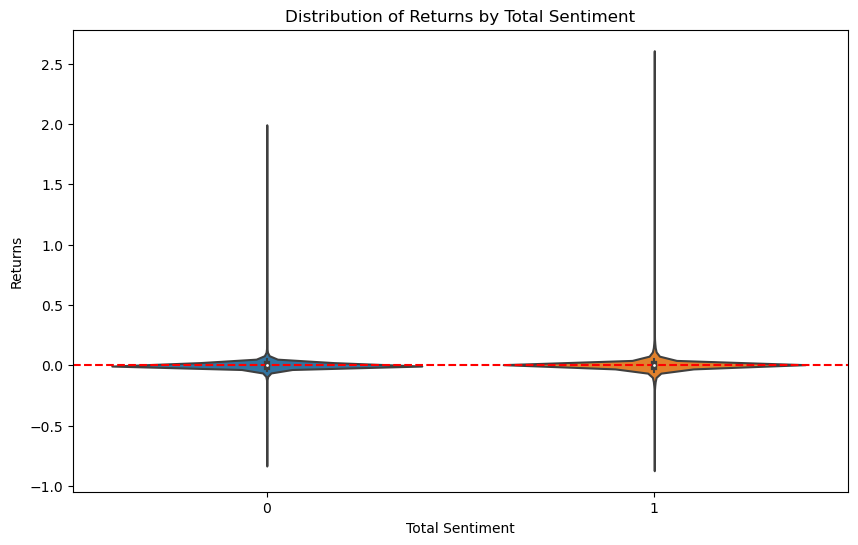

In [8]:
# Create dummy_negative column
russell['dummy_negative'] = (russell['negative'] >= 1).astype(int)

# Create dummy_positive column
russell['dummy_positive'] = (russell['positive'] >= 1).astype(int)

# Create dummy_total column
russell['dummy_total'] = (russell['total'] >= 1).astype(int)


# Function to plot with additional lines
def plot_with_lines(data, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=data)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    # Add blue dashed lines for critical points of value >= 1 category
    for i, box in enumerate(data.groupby(x_col)[y_col]):
        if box[0] == 1:
            quartiles = box[1].quantile([0.25, 0.5, 0.75])
            plt.axhline(y=quartiles[0.25], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.5], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.75], color='blue', linestyle='--', alpha=0.3)              
            iqr = quartiles[0.75] - quartiles[0.25]
            upper_limit = 1.5 * iqr + quartiles[0.75]
            lower_limit = quartiles[0.25] - 1.5 * iqr
            # Add additional blue dashed lines
            plt.axhline(y=upper_limit, color='blue', linestyle='--', alpha=0.3)  # Upper limit
            plt.axhline(y=lower_limit, color='blue', linestyle='--', alpha=0.3)  # Lower limit
    plt.title(title)
    plt.xlabel(x_col.capitalize() + ' Sentiment')
    plt.ylabel('Returns')
    plt.show()


# Box plot for dummy_positive
plot_with_lines(russell, 'dummy_positive', 'RET', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(russell, 'dummy_negative', 'RET', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(russell, 'dummy_total', 'RET', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()


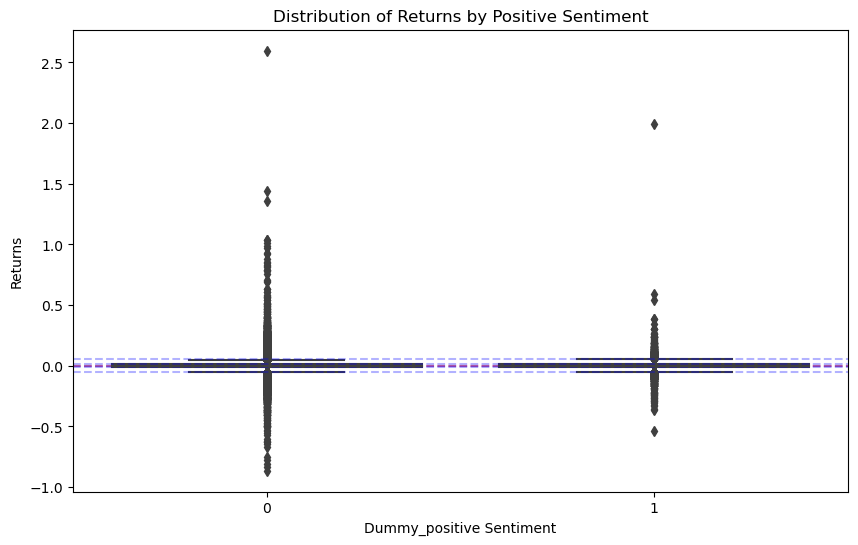

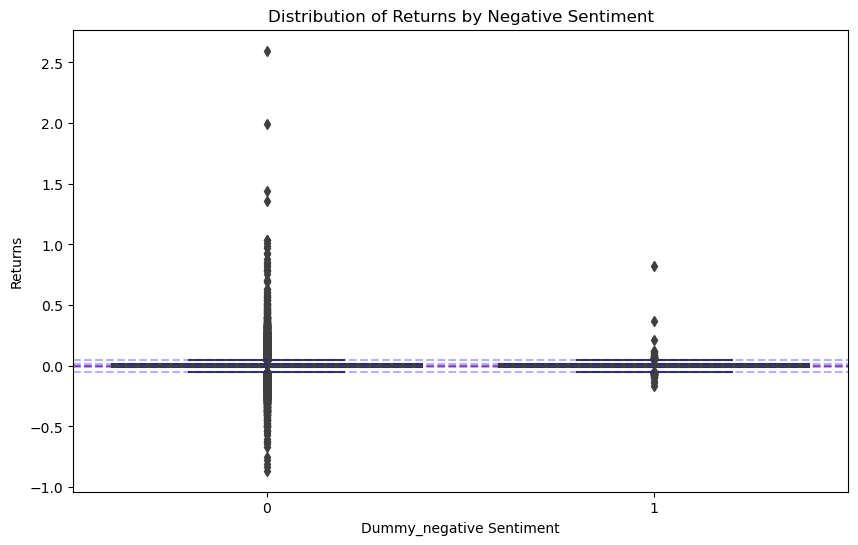

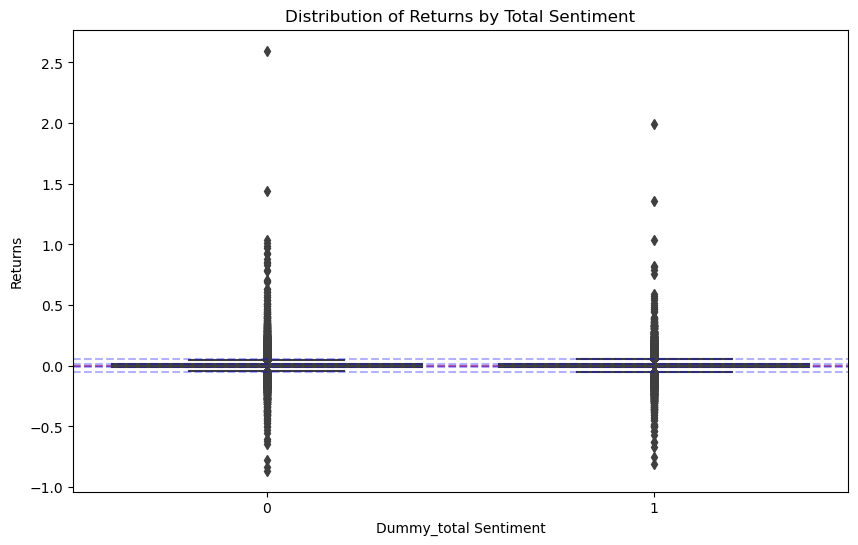

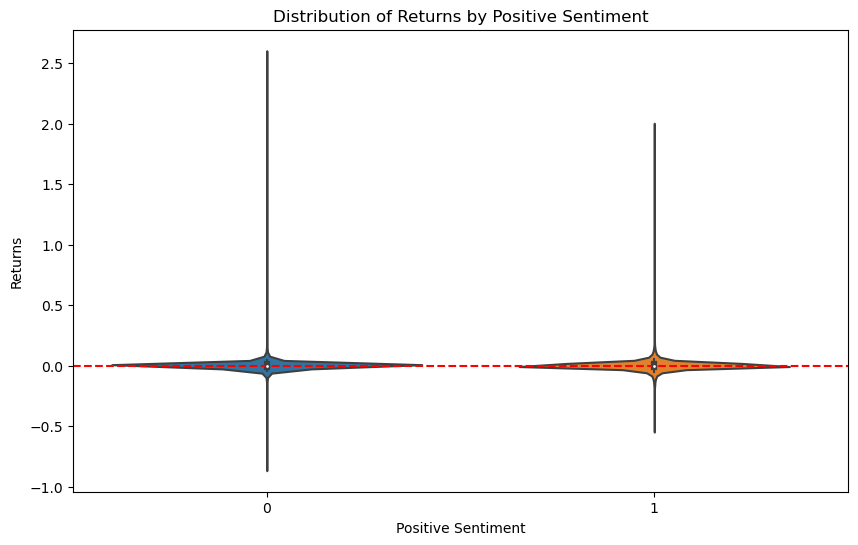

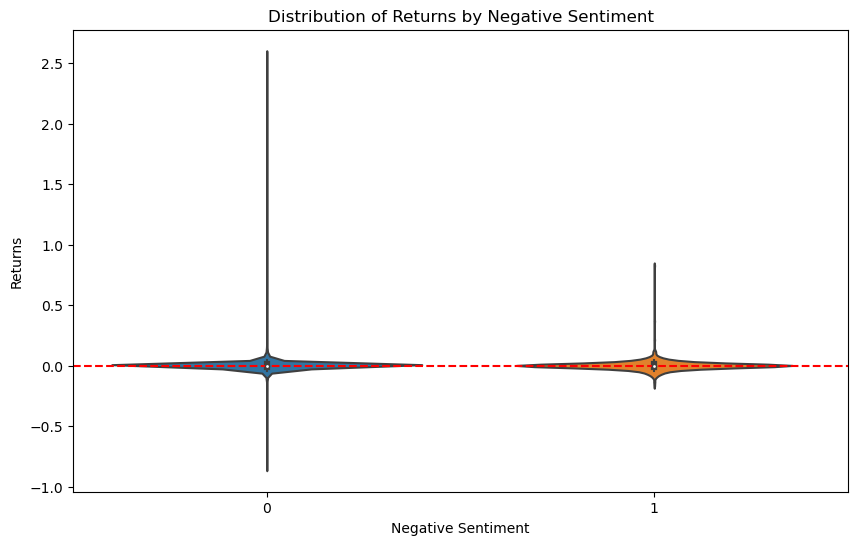

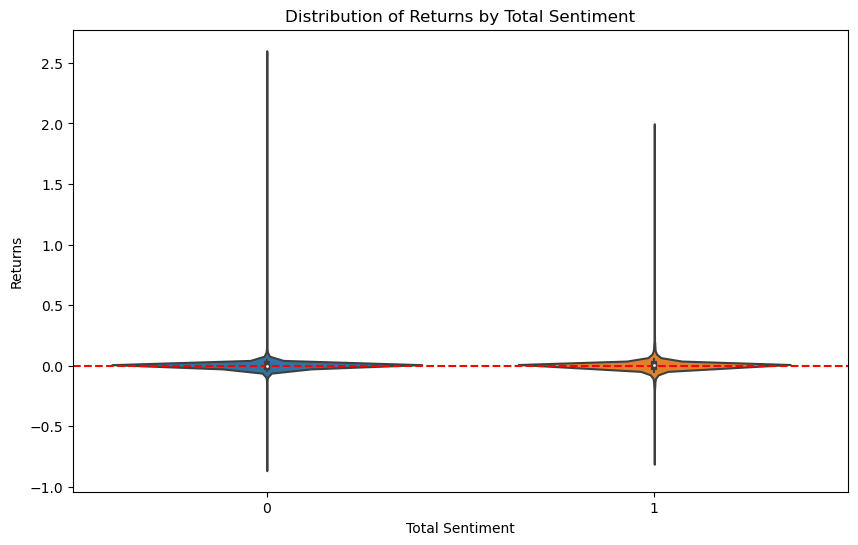

In [9]:
# Box plot for dummy_positive
plot_with_lines(russell, 'dummy_positive', 'tomorrow_return', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(russell, 'dummy_negative', 'tomorrow_return', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(russell, 'dummy_total', 'tomorrow_return', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='tomorrow_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='tomorrow_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='tomorrow_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()

In [10]:
from scipy.stats import ttest_ind, mannwhitneyu

# Define a function to remove outliers using Z-score
def remove_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df_filtered = df[(z_scores.abs() < threshold)]
    return df_filtered

# Remove outliers from the russell DataFrame
russell = remove_outliers(russell, 'Ask_minus_Bid')
russell = remove_outliers(russell, 'VOL')
russell.to_csv('daily_russell_regression.csv', index=False)

# Calculate mean and standard deviation (volatility) for each combination of dummy variables
mean_negative = russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'].mean()
std_negative = russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'].std()

mean_positive = russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'].mean()
std_positive = russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'].std()

mean_total = russell[russell['dummy_total'] == 1]['Ask_minus_Bid'].mean()
std_total = russell[russell['dummy_total'] == 1]['Ask_minus_Bid'].std()

# Calculate mean and standard deviation (volatility) when the dummy variables are equal to zero
mean_negative_zero = russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'].mean()
std_negative_zero = russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'].std()

mean_positive_zero = russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'].mean()
std_positive_zero = russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'].std()

mean_total_zero = russell[russell['dummy_total'] == 0]['Ask_minus_Bid'].mean()
std_total_zero = russell[russell['dummy_total'] == 0]['Ask_minus_Bid'].std()

# t-test for mean difference
t_statistic_mean_negative, p_value_mean_negative = ttest_ind(russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                             russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'])

t_statistic_mean_positive, p_value_mean_positive = ttest_ind(russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                             russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'])

t_statistic_mean_total, p_value_mean_total = ttest_ind(russell[russell['dummy_total'] == 1]['Ask_minus_Bid'],
                                                       russell[russell['dummy_total'] == 0]['Ask_minus_Bid'])

# Mann-Whitney U test for difference in volatility
u_statistic_vol_negative, p_value_vol_negative = mannwhitneyu(russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                              russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'])

u_statistic_vol_positive, p_value_vol_positive = mannwhitneyu(russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                              russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'])

u_statistic_vol_total, p_value_vol_total = mannwhitneyu(russell[russell['dummy_total'] == 1]['Ask_minus_Bid'],
                                                        russell[russell['dummy_total'] == 0]['Ask_minus_Bid'])

# Create a DataFrame to display the results
data = {
    'Dummy': ['Negative', 'Positive', 'Total'],
    'Mean_with_Dummy': [mean_negative, mean_positive, mean_total],
    'Mean_without_Dummy': [mean_negative_zero, mean_positive_zero, mean_total_zero],
    'Volatility_with_Dummy': [std_negative, std_positive, std_total],
    'Volatility_without_Dummy': [std_negative_zero, std_positive_zero, std_total_zero],
    'Mean_Difference': [mean_negative - mean_negative_zero,
                        mean_positive - mean_positive_zero,
                        mean_total - mean_total_zero],
    'Volatility_Difference': [std_negative - std_negative_zero,
                              std_positive - std_positive_zero,
                              std_total - std_total_zero],
    'Mean_P_value': [p_value_mean_negative, p_value_mean_positive, p_value_mean_total],
    'Volatility_P_value': [p_value_vol_negative, p_value_vol_positive, p_value_vol_total]
}
df_results = pd.DataFrame(data)

# Display the results
print(df_results)

      Dummy  Mean_with_Dummy  Mean_without_Dummy  Volatility_with_Dummy  \
0  Negative         2.414585            2.269296               3.879333   
1  Positive         2.901488            2.256752               5.163892   
2     Total         2.730522            2.198730               5.807856   

   Volatility_without_Dummy  Mean_Difference  Volatility_Difference  \
0                  5.471520         0.145289              -1.592187   
1                  5.474573         0.644736              -0.310681   
2                  5.411982         0.531792               0.395874   

    Mean_P_value  Volatility_P_value  
0   4.579368e-01        5.036088e-02  
1   3.071141e-30       2.284215e-139  
2  8.009373e-117        0.000000e+00  


In [11]:
# Specify the columns for which to calculate z-scores
columns_to_standardize = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'RETX', 'sprtrn', 'market_cap', 'yesterday_return', '10_day_ma', '20_day_ma', 
                          '30_day_ma', 'Ask_minus_Bid', 'yesterday_volume']

# Group by ticker and standardize each group for specified columns
russell_grouped = russell.groupby('TICKER')[columns_to_standardize]

# Define a function to standardize values within each group
def standardize_group(group):
    group_std = (group - group.mean()) / group.std()
    return group_std

# Apply the standardization function to each group
russell_standardized = russell_grouped.transform(standardize_group)

# Replace original values with standardized values in the original DataFrame
russell[columns_to_standardize] = russell_standardized

# Check the modified DataFrame
print(russell.head())

   PERMNO       date   SICCD TICKER                  COMNAM     BIDLO  \
0   10026 2023-01-03  2052.0   JJSF  J & J SNACK FOODS CORP -0.876646   
1   10026 2023-01-04  2052.0   JJSF  J & J SNACK FOODS CORP -0.531881   
2   10026 2023-01-05  2052.0   JJSF  J & J SNACK FOODS CORP -0.701537   
3   10026 2023-01-06  2052.0   JJSF  J & J SNACK FOODS CORP -0.574431   
4   10026 2023-01-09  2052.0   JJSF  J & J SNACK FOODS CORP -0.623530   

      ASKHI       PRC       VOL       RET  ...  yesterday_volume  10_day_ma  \
0 -0.712429 -0.590118  0.501661  0.809380  ...               NaN        NaN   
1 -0.585003 -0.618775 -0.481480 -0.167713  ...          0.498826        NaN   
2 -0.594805 -0.797327 -0.282267 -0.817016  ...         -0.482884        NaN   
3 -0.559952 -0.462265 -0.373684  1.422670  ...         -0.283961        NaN   
4 -0.650349 -0.796226 -0.209358 -1.476494  ...         -0.375245        NaN   

   20_day_ma  30_day_ma  proper?  Ask_minus_Bid  comp_size  dummy_negative  \
0       

Kurtosis:
BIDLO               -0.417826
ASKHI               -0.425864
PRC                 -0.262901
VOL                 30.581973
RET                  7.760771
SHROUT              -0.045054
RETX                 7.756393
sprtrn              -0.207948
market_cap          -0.260127
yesterday_return     8.774191
10_day_ma           12.335878
20_day_ma            6.709541
30_day_ma            4.272203
Ask_minus_Bid       12.550931
yesterday_volume    35.893421
dtype: float64

Skewness:
BIDLO               0.192350
ASKHI               0.206701
PRC                 0.184089
VOL                 4.058808
RET                 0.177404
SHROUT             -0.104274
RETX                0.175583
sprtrn             -0.008967
market_cap          0.195449
yesterday_return    0.205610
10_day_ma           1.150619
20_day_ma           0.673187
30_day_ma           0.432442
Ask_minus_Bid       2.506452
yesterday_volume    4.467116
dtype: float64


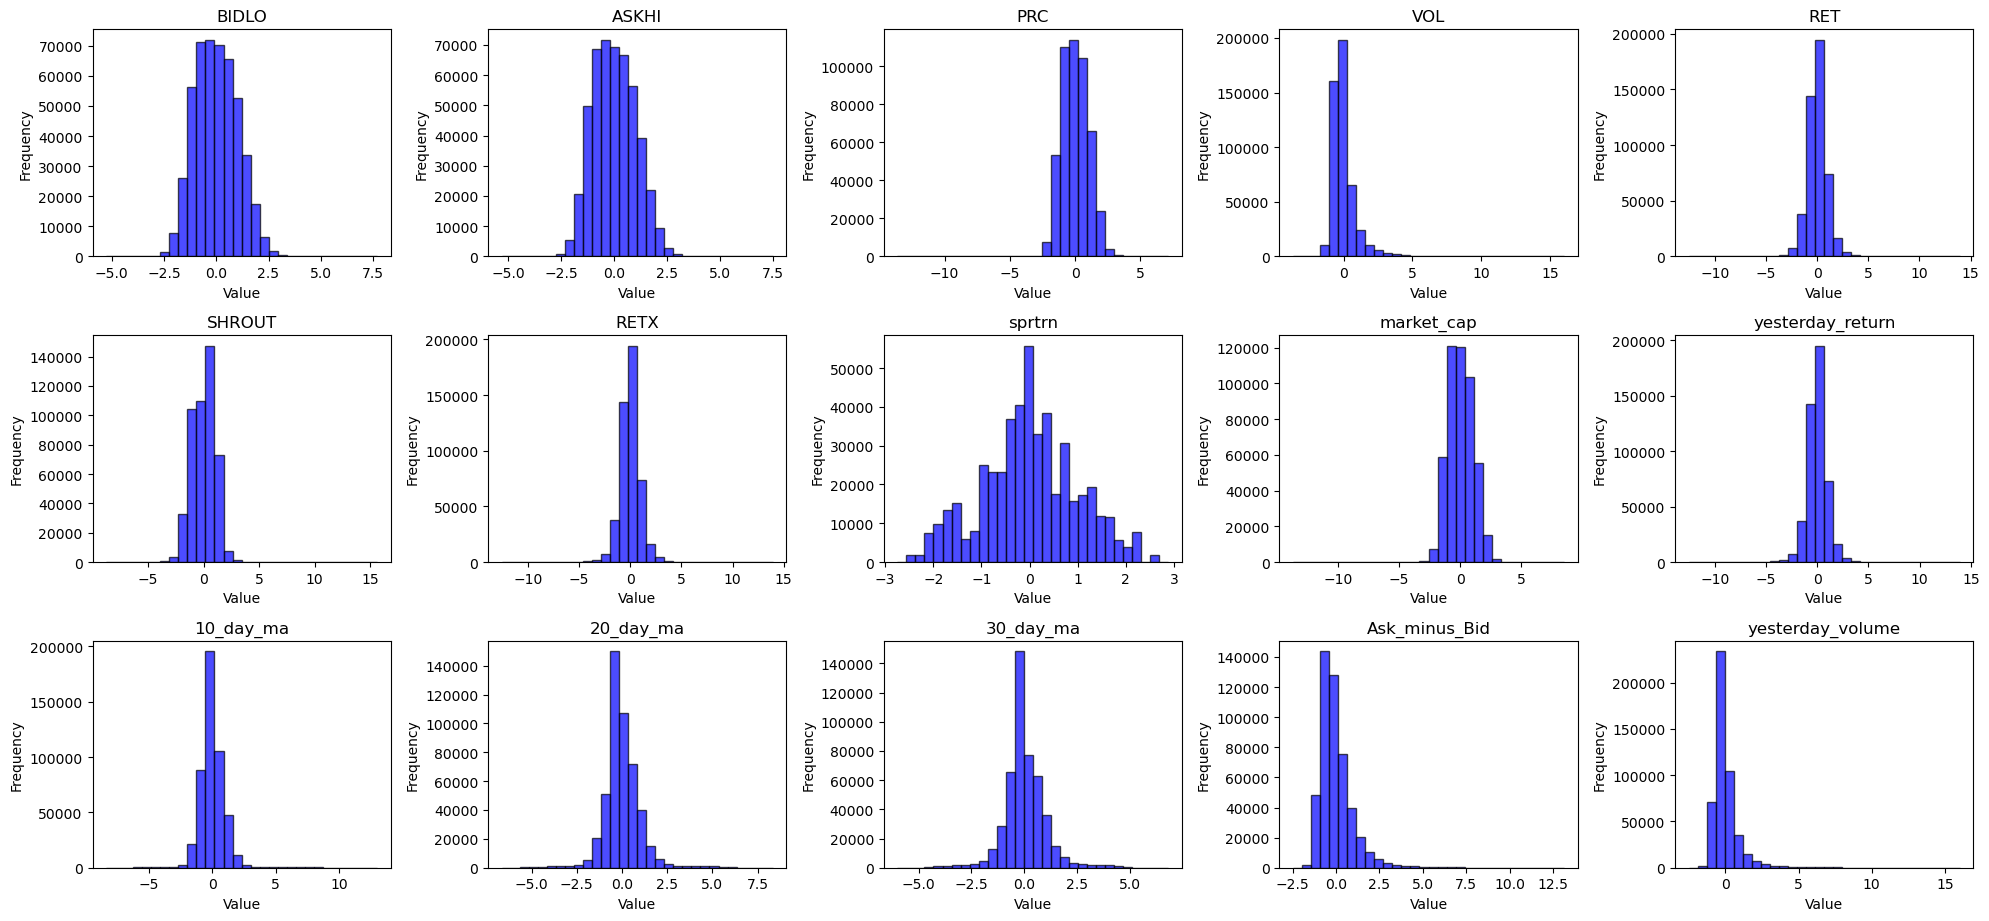

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate kurtosis and skewness for each numeric variable
numeric_columns = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'RETX', 'sprtrn', 'market_cap', 'yesterday_return', 
                   '10_day_ma', '20_day_ma', '30_day_ma', 'Ask_minus_Bid', 'yesterday_volume']
kurtosis_values = russell[numeric_columns].kurtosis()
skewness_values = russell[numeric_columns].skew()

# Print kurtosis and skewness values for each numeric variable
print("Kurtosis:")
print(kurtosis_values)
print("\nSkewness:")
print(skewness_values)

# Plot histograms for each numeric variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(russell[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
russell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483579 entries, 0 to 490138
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PERMNO            483579 non-null  int64         
 1   date              483579 non-null  datetime64[ns]
 2   SICCD             483385 non-null  float64       
 3   TICKER            483579 non-null  object        
 4   COMNAM            483579 non-null  object        
 5   BIDLO             483576 non-null  float64       
 6   ASKHI             483576 non-null  float64       
 7   PRC               483576 non-null  float64       
 8   VOL               483576 non-null  float64       
 9   RET               483554 non-null  float64       
 10  SHROUT            479282 non-null  float64       
 11  RETX              483554 non-null  float64       
 12  sprtrn            483576 non-null  float64       
 13  positive          483579 non-null  float64       
 14  nega

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Convert specified columns to categorical
russell['SICCD'] = russell['SICCD'].astype('category')
russell['comp_size'] = russell['comp_size'].astype('category')
russell['proper?'] = russell['proper?'].astype('category')
russell['dummy_negative'] = russell['dummy_negative'].astype('category')
russell['dummy_positive'] = russell['dummy_positive'].astype('category')
russell['dummy_total'] = russell['dummy_total'].astype('category')

russell.to_csv('standardized_daily_russell_regression.csv', index=False)
russell_clean = russell.dropna()

# Select features and target variable
features = russell_clean.drop(columns=['tomorrow_return', 'TICKER', 'COMNAM', 'date'])
target = russell_clean['tomorrow_return']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude="object")),
        ('cat', categorical_transformer, selector(dtype_include="object"))
    ])

# Define LassoCV model
lasso_cv = LassoCV(cv=5, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lasso', lasso_cv)])

# Fit the model
pipeline.fit(X_train, y_train)

# Print the best alpha
print("Best alpha:", pipeline.named_steps['lasso'].alpha_)

# Print the R^2 score
print("R^2 score:", pipeline.score(X_test, y_test))

# Access the model coefficients
model_coefs = pipeline.named_steps['lasso'].coef_
print("Model coefficients:", model_coefs)

Best alpha: 2.620448862345496e-06
R^2 score: 0.012862655720963234
Model coefficients: [-6.67745126e-05  6.21227090e-05 -4.42599056e-03  0.00000000e+00
  1.12040469e-03  8.26345211e-05 -0.00000000e+00 -4.21202380e-04
 -5.77262046e-04  1.09609684e-03  1.34865112e-05 -2.51916567e-05
 -5.69652728e-06 -1.97526507e-04 -9.00430300e-05  5.11152717e-04
  6.03732433e-04 -4.36677425e-04  6.15957752e-04  1.59524519e-03
 -2.14977623e-04 -1.38491618e-04  5.66329673e-06 -4.28342470e-05
  3.83821494e-05]


In [15]:
russell1 = russell.copy()
russell1.to_csv('standardized_russell_regression.csv', index=False)

C:\Users\joel3\AppData\Local\Temp\ipykernel_13176\3987369405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russell['pred_lasso'] = pipeline.predict(russell.drop(columns=['tomorrow_return', 'TICKER', 'COMNAM', 'date']))


    PERMNO       date   SICCD TICKER                  COMNAM     BIDLO  \
29   10026 2023-02-14  2052.0   JJSF  J & J SNACK FOODS CORP -1.583958   
30   10026 2023-02-15  2052.0   JJSF  J & J SNACK FOODS CORP -1.722191   
31   10026 2023-02-16  2052.0   JJSF  J & J SNACK FOODS CORP -1.761468   
32   10026 2023-02-17  2052.0   JJSF  J & J SNACK FOODS CORP -1.835483   
33   10026 2023-02-21  2052.0   JJSF  J & J SNACK FOODS CORP -1.610905   

       ASKHI       PRC       VOL       RET  ...  10_day_ma  20_day_ma  \
29 -1.595700 -1.781575 -0.514877 -1.491794  ...  -1.754809  -1.439081   
30 -1.854910 -1.771656 -0.481347  0.002316  ...  -1.733322  -1.485314   
31 -1.873425 -1.895099 -0.078508 -0.618119  ...  -1.747455  -1.531547   
32 -1.724760 -1.577671 -0.442951  1.444537  ...  -1.732633  -1.542002   
33 -1.469363 -1.433286 -0.021685  0.619504  ...  -1.715282  -1.546656   

    30_day_ma  proper?  Ask_minus_Bid  comp_size  dummy_negative  \
29  -1.213692    False      -0.069571        4.0

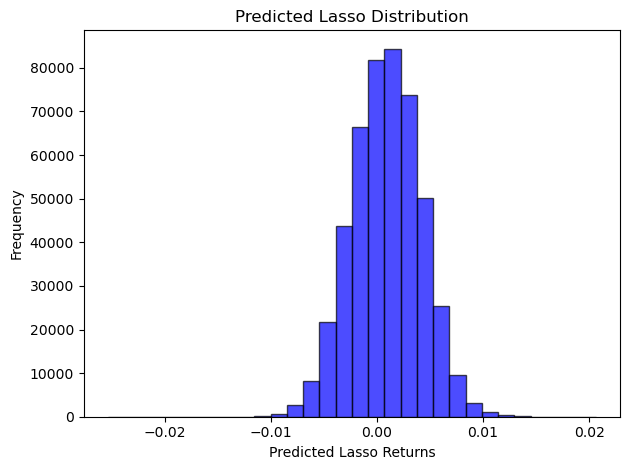

In [16]:
russell = russell.dropna()

# Add a new column 'pred_lasso' to the russell dataframe with predictions
russell['pred_lasso'] = pipeline.predict(russell.drop(columns=['tomorrow_return', 'TICKER', 'COMNAM', 'date']))

# Display the first few rows of the dataframe to verify the new column
print(russell.head())

plt.hist(russell['pred_lasso'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Predicted Lasso Distribution')
plt.xlabel('Predicted Lasso Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=12)

# Create pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_forest', rf_model)])

# Define parameter grid
param_grid = {
    'random_forest__n_estimators': [50, 100],
    'random_forest__max_depth': [None, 10],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__min_samples_leaf': [1, 2]
}

# Perform grid search with reduced parameters and folds
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Print the best R^2 score
print("Best R^2 score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test set R^2 score of the best model:", test_score)
